# Name: Sourabh Barala
# Course: M.Sc. Data Science
# Semester: 1st
# Reg. No.: 23MSD7044
# Subject: Fundatmental of Data Science 
#
#
#
#
#
#
#



In [78]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge,Lasso,LinearRegression
from sklearn.metrics import mean_squared_error as mse
import seaborn as sns

import matplotlib.pyplot as plt

In [79]:
data=pd.read_csv('BostonHousing.csv')

In [80]:
data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,price
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


### Construct the correlation heat map for all the variables. What do you observe?

In [81]:
corr=data.corr()

<Axes: >

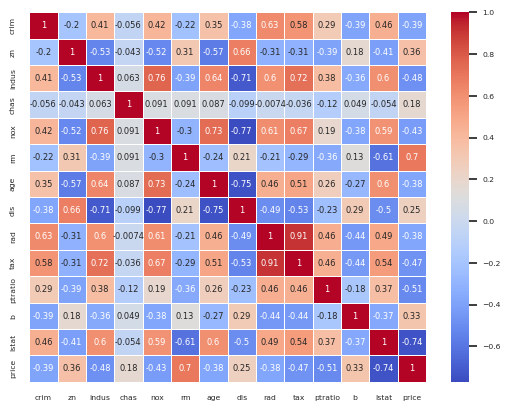

In [106]:
sns.set(font_scale=0.5)
sns.heatmap(corr,cmap='coolwarm',annot=True,linewidths=0.5)

### Divide the data such that 75% data is train and remaining is test.

In [83]:
independent_vars=data[data.columns[:-1]]
price=data['price']
r_data=np.array(independent_vars).reshape(independent_vars.shape)
r_price=np.array(price).reshape(-1,1)

In [84]:
train_data,test_data,train_price,test_price=train_test_split(r_data,r_price,train_size=0.75,random_state=1)

### Fit multiple linear regression model, ridge regression and lasso regression with (α = 1), the tuning parameter on the train data.

In [85]:
linear_model=LinearRegression()
ridge_model=Ridge(alpha=1)
lasso_model=Lasso(alpha=1)

In [86]:
linear_model.fit(train_data,train_price)
ridge_model.fit(train_data,train_price)
lasso_model.fit(train_data,train_price)

Lasso(alpha=1)

### Extract the estimated coefficient values for each model with respect to the independent variables as output. What are the changes you observe in the coefficient values?

In [87]:
coef_for_linear=linear_model.coef_[0]
print(f'coefficients: {coef_for_linear}\nintercept: {linear_model.intercept_}')

coefficients: [-1.14428903e-01  5.71299780e-02  3.83002824e-02  2.42854641e+00
 -2.12326236e+01  2.87723416e+00  6.91118094e-03 -1.47158266e+00
  3.05784197e-01 -1.06750361e-02 -9.96138270e-01  6.27746234e-03
 -5.57414427e-01]
intercept: [45.19251539]


In [88]:
coef_for_ridge=ridge_model.coef_[0]
print(f'coefficients: {coef_for_ridge}\nintercept: {ridge_model.intercept_}')

coefficients: [-1.09313326e-01  5.81466109e-02 -6.57912472e-03  2.17625586e+00
 -1.14648161e+01  2.96948364e+00 -1.23491124e-03 -1.33558053e+00
  2.86708621e-01 -1.17634405e-02 -8.80356116e-01  6.85811788e-03
 -5.68412252e-01]
intercept: [38.1537646]


In [89]:
coef_for_lasso=lasso_model.coef_
print(f'coefficients: {coef_for_lasso}\nintercept: {lasso_model.intercept_}')

coefficients: [-0.06878405  0.05536254 -0.          0.         -0.          0.
  0.02336436 -0.54610017  0.24646698 -0.01288932 -0.73552217  0.00590525
 -0.79338245]
intercept: [47.06409184]


observation: Coefficent values in Lasso regression are tending to zero

### Use the fitted models on the test data to predict price and compute the MSE for each model. Which model gives the best prediction?

In [90]:
pred_for_linear=linear_model.predict(test_data)
pred_for_ridge=ridge_model.predict(test_data)
pred_for_lasso=lasso_model.predict(test_data)

In [91]:
mse_for_linear=mse(test_price,pred_for_linear)
mse_for_ridge=mse(test_price,pred_for_ridge)
mse_for_lasso=mse(test_price,pred_for_lasso)

In [92]:
print(f'MSE for Linear Regression: {mse_for_linear}\nMSE for Ridge Regression: {mse_for_ridge}\nMSE for Lasso Regression: {mse_for_lasso}')

MSE for Linear Regression: 21.89776539604947
MSE for Ridge Regression: 21.319619091968626
MSE for Lasso Regression: 33.46214285179805


observation: Ridge linear regression has the least MSE, hence ridge model gives best predictions

### Create three adjacent barplots with respect to each estimated coefficient value corresponding to each independent variable. Use green, red and blue respectively for linear, ridge and lasso.

In [93]:
independent_names=[i for i in data.columns if i!='price']

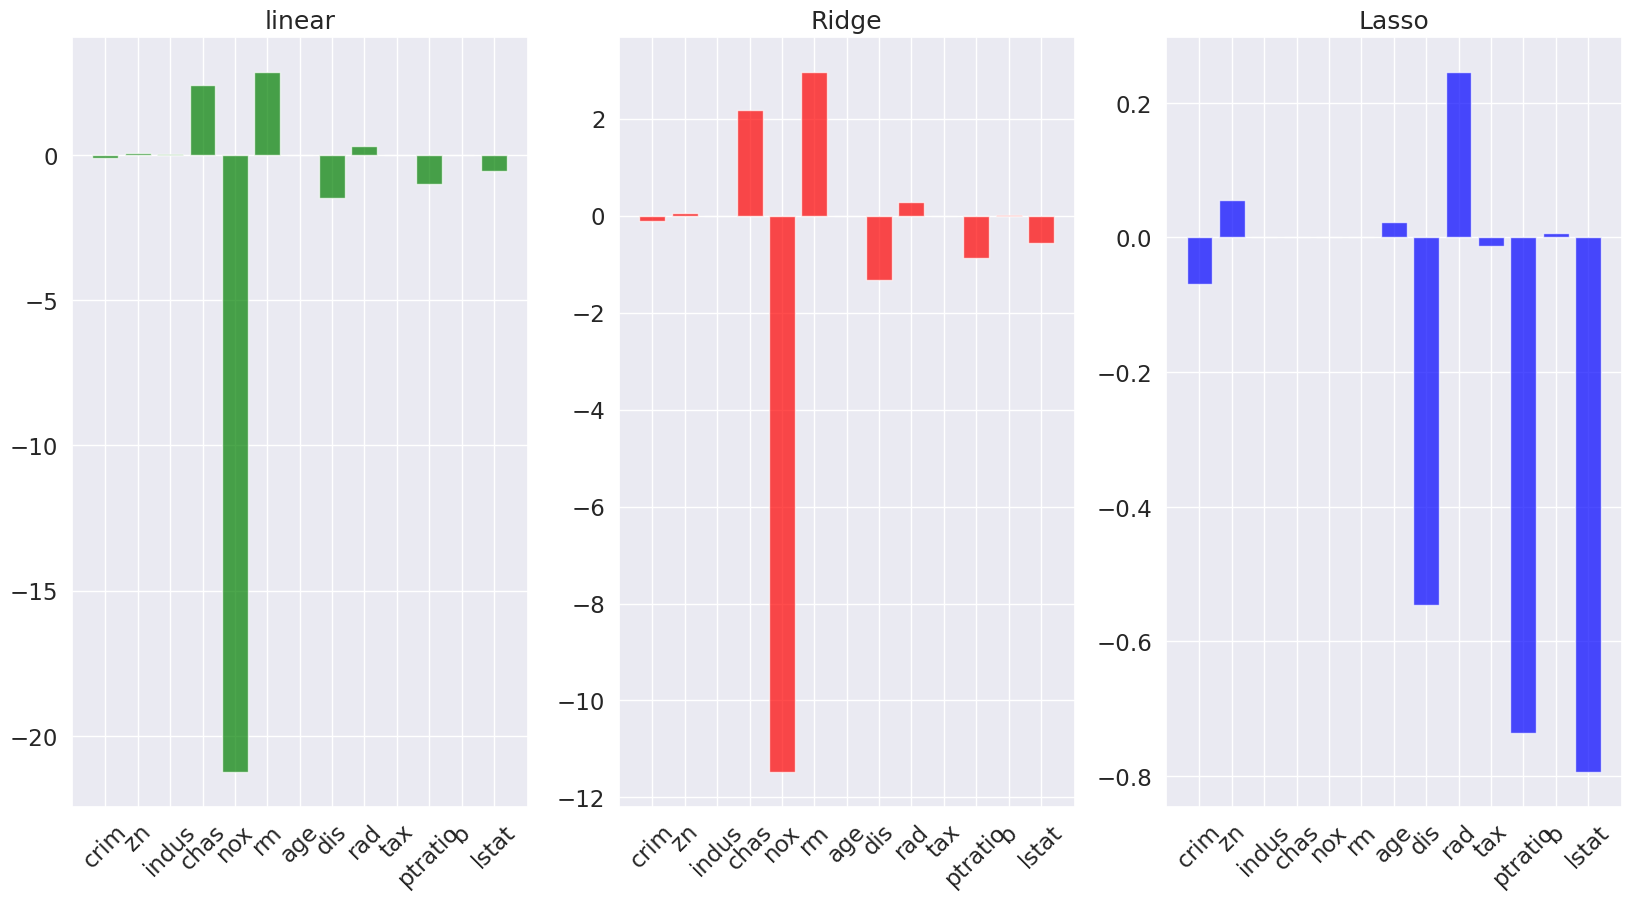

In [95]:

sns.set(font_scale=1.5)
fig,axes=plt.subplots(nrows=1,ncols=3,figsize=(20,10))

axes[0].bar(independent_names,coef_for_linear,color='green',alpha=0.7)
axes[0].set_title('linear')
axes[0].tick_params(axis='x',rotation=45)
axes[1].bar(independent_names,coef_for_ridge,color='red',alpha=0.7)
axes[1].set_title('Ridge')
axes[1].tick_params(axis='x',rotation=45)

axes[2].bar(independent_names,coef_for_lasso,color='blue',alpha=0.7)
axes[2].set_title('Lasso')
axes[2].tick_params(axis='x',rotation=45)
plt.show()

### Is lasso eliminating the correlated variables?

Yes Lasso regression has made coeffient value of ['chas', 'indus', 'nox' and 'rm'] zero, hence eliminated them.